In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
from tabulate import tabulate

## Group 7 - Assignment 1

### Import data

In [108]:
df = pd.read_csv("sparklingwine.csv", sep=',')
df.shape

(800, 12)

### Create new binary column "goodwine" to indicate if the wine is good (quality >= 6)

In [109]:
df['goodwine'] = df.quality.apply(lambda x: int(x>=6))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodwine
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,5,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,0


### Split the data into train (first 400), validation (next 200) and test (last 200)

In [110]:
df_train = df.iloc[0:400]
df_validation = df.iloc[400:600]
df_test = df.iloc[600:]

# df_train_validation is used for training the scaler
df_train_validation = df.iloc[0:600]
X_train_validation = df_train_validation.drop(['goodwine','quality'], axis=1) # drop the quality because we derived goodwine from quality

X_train = df_train.drop(['goodwine','quality'], axis=1)
y_train = df_train['goodwine']

X_validation = df_validation.drop(['goodwine','quality'], axis=1)
y_validation = df_validation['goodwine']

X_test = df_test.drop(['goodwine','quality'], axis=1)
y_test = df_test['goodwine']


### Normalize the data with Z score

In [111]:
# scaler can be used for later X_validation and X_test
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

### Train the KNN model with k=1,2 ...100

In [112]:
accuracy_list = []
tb_list = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_validation)
    # print(classification_report(y_validation, prediction))
    a_score = accuracy_score(y_validation, prediction)
    accuracy_list.append(a_score)
    result = k, a_score
    tb_list.append(result)
print(tabulate(tb_list, headers=['K',"Accuracy"], tablefmt='grid'))

+-----+------------+
|   K |   Accuracy |
+=====+============+
|   1 |      0.86  |
+-----+------------+
|   2 |      0.85  |
+-----+------------+
|   3 |      0.85  |
+-----+------------+
|   4 |      0.835 |
+-----+------------+
|   5 |      0.865 |
+-----+------------+
|   6 |      0.87  |
+-----+------------+
|   7 |      0.875 |
+-----+------------+
|   8 |      0.87  |
+-----+------------+
|   9 |      0.875 |
+-----+------------+
|  10 |      0.855 |
+-----+------------+
|  11 |      0.87  |
+-----+------------+
|  12 |      0.855 |
+-----+------------+
|  13 |      0.875 |
+-----+------------+
|  14 |      0.87  |
+-----+------------+
|  15 |      0.89  |
+-----+------------+
|  16 |      0.88  |
+-----+------------+
|  17 |      0.875 |
+-----+------------+
|  18 |      0.88  |
+-----+------------+
|  19 |      0.875 |
+-----+------------+
|  20 |      0.875 |
+-----+------------+
|  21 |      0.865 |
+-----+------------+
|  22 |      0.87  |
+-----+------------+
|  23 |      

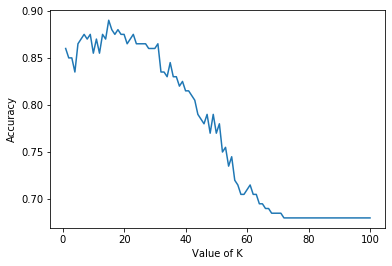

In [113]:
plt.plot(range(1,101), accuracy_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

### When k = 15, the accuracy is the highest (0.89) on the validation data, so we decide to pick k = 15 for the model

### Predict the test data

In [114]:
df_train_final = df.iloc[0:600]

X_train_final = df_train_final.drop(['goodwine','quality'], axis=1)
y_train_final = df_train_final['goodwine']

scaler = StandardScaler().fit(X_train_final) # getting new scaler from the combination of train and validation

X_train_final = scaler.transform(X_train_final)

X_test_final = scaler.transform(X_test)

knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train_final, y_train_final)
prediction = knn_15.predict(X_test_final)
accuracy = accuracy_score(y_test, prediction)
print("The accuracy is {}".format(accuracy))
g_error = 1 - accuracy
g_error = round(g_error,2)
print("The generalisation error is {}".format(g_error))

The accuracy is 0.98
The generalisation error is 0.02


### How to judge whether the classifier is well-suited for the data set?

#### When doing this assignment - we have only learnt one performance metric, which is Accuracy. Our accuracy is at 98% which is considered good. However, knowing that this is a classification model - we would also need to dig deeper in looking, firstly at the confusion matrix to measure the models false positive rate and true positive rate. Espicially, because good wine only represents 15% of the entire data set. This type of evaluation would have been done in the calibration step when we were assessing the model performance with the validaiton set (like the confusion matrix below)

In [115]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
prediction = knn.predict(X_validation)
print(classification_report(y_validation, prediction))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       136
           1       0.98      0.67      0.80        64

    accuracy                           0.89       200
   macro avg       0.92      0.83      0.86       200
weighted avg       0.90      0.89      0.88       200

